<a href="https://colab.research.google.com/github/drshtijivani/Smart-Shield-Real-time-Soldier-Health-Monitoring-System/blob/main/Health_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv("health.csv")
data.head()

,id,age,heart_rate,temperature,SpO2_saturation,bpm,Premedication
0,1,66.0,70,38.6,88.0,75,yes
1,2,56.0,74,39.6,88.0,70,yes
2,3,46.0,82,37.2,98.0,83,NO
3,4,60.0,90,38.6,98.0,75,NO
4,5,58.0,72,39.6,93.0,78,yes


In [ ]:
data.tail()

,id,age,heart_rate,temperature,SpO2_saturation,bpm,Premedication
1080,1081,24.0,110,38.0,30.0,72,yes
1081,1082,35.0,110,38.0,30.0,74,yes
1082,1083,NaN,110,38.0,30.0,68,yes
1083,1084,NaN,110,38.0,30.0,67,yes
1084,1085,70.0,110,38.0,30.0,70,yes


In [ ]:
X = data[['age','temperature', 'bpm', 'heart_rate', 'SpO2_saturation']]
y = data['Premedication']

In [ ]:
data.shape

(1085, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1085 non-null   int64  
 1   age              843 non-null    float64
 2   heart_rate       1085 non-null   int64  
 3   temperature      1085 non-null   float64
 4   SpO2_saturation  1085 non-null   float64
 5   bpm              1085 non-null   int64  
 6   Premedication    1085 non-null   object 
dtypes: float64(3), int64(3), object(1)
memory usage: 59.5+ KB


In [ ]:
data.describe()

,id,age,heart_rate,temperature,SpO2_saturation,bpm
count,1085.000000,843.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,543.000000,49.483689,89.812903,38.562488,66.707465,71.221198
std,313.356825,18.255334,19.685747,4.592419,30.251069,13.148559
min,1.000000,0.250000,47.000000,36.000000,20.000000,44.000000
25%,272.000000,35.000000,72.000000,38.000000,30.000000,59.000000
50%,543.000000,51.000000,91.000000,38.100000,82.000000,72.000000
75%,814.000000,64.000000,110.000000,38.500000,87.300000,81.000000
max,1085.000000,96.000000,120.000000,95.000000,340.000000,109.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
svm_classifier = SVC(kernel='rbf', random_state=42)

In [ ]:
svm_classifier.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [ ]:
predictions = svm_classifier.predict(X_test_scaled)


In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9815668202764977


In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)

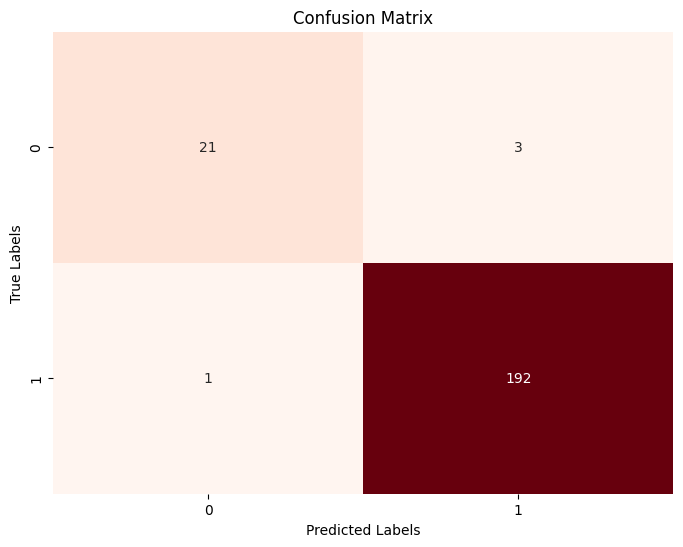

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()